In [3]:
#setting up my usual packages
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import sys
import operator
from scipy import stats
import requests
from IPython.display import HTML
import matplotlib as plt
import pylab as pl
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas.tools
from pandas import DataFrame

try: 
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
PUIdata = os.getenv('PUIDATA')
print (PUIdata)

/home/cusp/rxl204/PUIdata


In [5]:
url = 'https://health.data.ny.gov/api/views/7iwk-yzcj/rows.csv?accessType=DOWNLOAD'
filename = 'hospital12.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [6]:
url = 'https://health.data.ny.gov/api/views/8uuc-49v9/rows.csv?accessType=DOWNLOAD'
filename = 'hospital13.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [7]:
url = 'https://health.data.ny.gov/api/views/wdtv-ip3j/rows.csv?accessType=DOWNLOAD'
filename = 'hospital14.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [8]:
dfh12 = pd.read_csv(PUIdata + '/hospital12.csv')
dfh13 = pd.read_csv(PUIdata + '/hospital13.csv')
dfh14 = pd.read_csv(PUIdata + '/hospital14.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
dfh12.shape

(35089, 37)

In [10]:
dfh1214 = pd.concat([dfh12, dfh13, dfh14])
dfh1214.shape

(107468, 37)

In [11]:
dfh1214.columns

Index([u'Health Service Area', u'Hospital County',
       u'Operating Certificate Number', u'Facility ID', u'Facility Name',
       u'Age Group', u'Zip Code - 3 digits', u'Gender', u'Race', u'Ethnicity',
       u'Length of Stay', u'Type of Admission', u'Patient Disposition',
       u'Discharge Year', u'CCS Diagnosis Code', u'CCS Diagnosis Description',
       u'CCS Procedure Code', u'CCS Procedure Description', u'APR DRG Code',
       u'APR DRG Description', u'APR MDC Code', u'APR MDC Description',
       u'APR Severity of Illness Code', u'APR Severity of Illness Description',
       u'APR Risk of Mortality', u'APR Medical Surgical Description',
       u'Payment Typology 1', u'Payment Typology 2', u'Payment Typology 3',
       u'Attending Provider License Number',
       u'Operating Provider License Number', u'Other Provider License Number',
       u'Birth Weight', u'Abortion Edit Indicator',
       u'Emergency Department Indicator', u'Total Charges', u'Total Costs'],
      dtype='obje

In [12]:
dfh1214 = dfh1214[['Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity','APR Severity of Illness Code']]
dfh1214.head()

,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,APR Severity of Illness Code
0,50 to 69,147,F,White,Not Span/Hispanic,1
1,0 to 17,147,M,White,Not Span/Hispanic,1
2,30 to 49,148,F,White,Not Span/Hispanic,2
3,50 to 69,148,F,White,Not Span/Hispanic,3
4,50 to 69,148,F,White,Not Span/Hispanic,4


## Exploratory Analysis 
1. Identify asthma hospitalisation counts by age group

In [13]:
dfh1214.groupby('Age Group').count()

,Zip Code - 3 digits,Gender,Race,Ethnicity,APR Severity of Illness Code
Age Group,,,,,
0 to 17,34730,34740,34740,34740,34740
18 to 29,6299,6301,6301,6301,6301
30 to 49,18297,18303,18303,18303,18303
50 to 69,30564,30572,30572,30572,30572
70 or Older,17537,17552,17552,17552,17552


In [14]:
dfh1214.groupby('Gender').count()

,Age Group,Zip Code - 3 digits,Race,Ethnicity,APR Severity of Illness Code
Gender,,,,,
F,64167,64142,64167,64167,64167
M,43301,43285,43301,43301,43301


In [15]:
url = 'https://data.cityofnewyork.us/api/views/uvpi-gqnh/rows.csv?accessType=DOWNLOAD'
filename = 'tree.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [16]:
#read files
df = pd.read_csv(PUIdata + '/tree.csv')
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [17]:
df.shape

(683788, 45)

In [18]:
#check most common tree types
tree_sort = df.spc_common.value_counts().reset_index().sort(ascending=[False])
tree_sort.columns = ['Tree Type', 'Count']
tree_sort

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,Tree Type,Count
0,London planetree,87014
1,honeylocust,64264
2,Callery pear,58931
3,pin oak,53185
4,Norway maple,34189
5,littleleaf linden,29742
6,cherry,29279
7,Japanese zelkova,29258
8,ginkgo,21024
9,Sophora,19338


In [19]:
tree_sort['ID'] = tree_sort.index
tree_sort.head()

,Tree Type,Count,ID
0,London planetree,87014,0
1,honeylocust,64264,1
2,Callery pear,58931,2
3,pin oak,53185,3
4,Norway maple,34189,4


In [20]:
tree_id = tree_sort[['Tree Type', 'ID']]
tree_id.head()

,Tree Type,ID
0,London planetree,0
1,honeylocust,1
2,Callery pear,2
3,pin oak,3
4,Norway maple,4


In [21]:
#merge back to df to assign ID to tree type 
df = df.merge(tree_id, left_on='spc_common', right_on='Tree Type')
df.columns

Index([u'tree_id', u'block_id', u'created_at', u'tree_dbh', u'stump_diam',
       u'curb_loc', u'status', u'health', u'spc_latin', u'spc_common',
       u'steward', u'guards', u'sidewalk', u'user_type', u'problems',
       u'root_stone', u'root_grate', u'root_other', u'trunk_wire',
       u'trnk_light', u'trnk_other', u'brch_light', u'brch_shoe',
       u'brch_other', u'address', u'postcode', u'zip_city', u'community board',
       u'borocode', u'borough', u'cncldist', u'st_assem', u'st_senate', u'nta',
       u'nta_name', u'boro_ct', u'state', u'latitude', u'longitude', u'x_sp',
       u'y_sp', u'council district', u'census tract', u'bin', u'bbl',
       u'Tree Type', u'ID'],
      dtype='object')

In [23]:
#read in nyc zipcode shapefile
zipsNYC = gpd.GeoDataFrame.from_file("data/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [24]:
df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
# Convert to a GeoDataFrame
df = gpd.GeoDataFrame(df, geometry="geometry")
df.crs = zipsNYC.crs

In [25]:
zipsNYC.crs

{'init': 'epsg:2263', 'no_defs': True}

In [26]:
df.crs = {'init' :'epsg:4326'}
zipsNYC.crs = {'init' :'epsg:4326'}

In [27]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,council district,census tract,bin,bbl,Tree Type,ID,geometry
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09,red maple,10,POINT (-73.84421522 40.72309177)
1,184031,504204,08/29/2015,3,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-73.903561,1.010930e+06,249304.4860,15.0,23502.0,2007746.0,2.028120e+09,red maple,10,POINT (-73.90356058 40.85091786)
2,208974,414958,09/08/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.106535,9.546483e+05,143693.7225,50.0,12806.0,5056270.0,5.040570e+09,red maple,10,POINT (-74.10653494 40.56103243)
3,198146,411699,09/02/2015,6,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.192553,9.307302e+05,135842.1792,51.0,17009.0,5092500.0,5.063120e+09,red maple,10,POINT (-74.19255287 40.53936939)
4,198230,411696,09/02/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.192161,9.308391e+05,135842.1992,51.0,17009.0,5092499.0,5.063120e+09,red maple,10,POINT (-74.19216109 40.5393701)


London planetrees are the most common type of trees in the city. it also commonly cited as the tree type that triggers respiratory problems such as asthma

https://www.asthmafoundation.org.nz/your-health/living-with-asthma/common-asthma-triggers

In [28]:
#filter data to include only plane trees
df = df.loc[df['spc_common'] == 'London planetree']
df.head()


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,council district,census tract,bin,bbl,Tree Type,ID,geometry
148225,192755,207508,08/31/2015,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,-73.969744,9.926537e+05,152903.6306,47.0,37402.0,3320727.0,3.072350e+09,London planetree,0,POINT (-73.96974394 40.58635725)
148226,203719,302371,09/05/2015,11,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,-73.911171,1.008850e+06,224349.0366,22.0,105.0,4019061.0,4.008710e+09,London planetree,0,POINT (-73.91117077 40.78242823)
148227,203726,302371,09/05/2015,8,0,OnCurb,Alive,Poor,Platanus x acerifolia,London planetree,...,-73.912020,1.008615e+06,224096.2740,22.0,105.0,4019059.0,4.008710e+09,London planetree,0,POINT (-73.91201957 40.78173511)
148228,195202,415896,09/01/2015,13,0,OnCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,-74.162670,9.390480e+05,142285.9579,51.0,14607.0,5072852.0,5.054910e+09,London planetree,0,POINT (-74.16267037999999 40.55710259)
148229,189465,219493,08/30/2015,22,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,-73.968211,9.930653e+05,192388.0651,35.0,191.0,3054331.0,3.018880e+09,London planetree,0,POINT (-73.96821054 40.69473314)


In [29]:
#check number of records
df.shape

(87014, 48)

In [30]:
df.columns

Index([u'tree_id', u'block_id', u'created_at', u'tree_dbh', u'stump_diam',
       u'curb_loc', u'status', u'health', u'spc_latin', u'spc_common',
       u'steward', u'guards', u'sidewalk', u'user_type', u'problems',
       u'root_stone', u'root_grate', u'root_other', u'trunk_wire',
       u'trnk_light', u'trnk_other', u'brch_light', u'brch_shoe',
       u'brch_other', u'address', u'postcode', u'zip_city', u'community board',
       u'borocode', u'borough', u'cncldist', u'st_assem', u'st_senate', u'nta',
       u'nta_name', u'boro_ct', u'state', u'latitude', u'longitude', u'x_sp',
       u'y_sp', u'council district', u'census tract', u'bin', u'bbl',
       u'Tree Type', u'ID', u'geometry'],
      dtype='object')

In [31]:
dfg= df.groupby('postcode')['spc_common'].count()
dfg.head()

postcode
83        54
10001     21
10002    388
10003    133
10004      8
Name: spc_common, dtype: int64

In [32]:
dfg = dfg.to_frame().reset_index()
dfg.head()

,postcode,spc_common
0,83,54
1,10001,21
2,10002,388
3,10003,133
4,10004,8


In [33]:
#read in nyc zipcode shapefile
zipsNYC = gpd.GeoDataFrame.from_file("data/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [34]:
zipsNYC.ZIPCODE = zipsNYC.ZIPCODE.astype(int)

In [35]:
#merge both based on zipcode
dfmap = pd.merge(zipsNYC, dfg, left_on='ZIPCODE', right_on='postcode')
dfmap

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,postcode,spc_common
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,452
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,413
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,1067
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,442
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,1016
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",11226,327
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",11219,890
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",11210,688
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",11230,1166
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,1365


Text(0.5,1,'Count of London Pine Trees Across New York City')

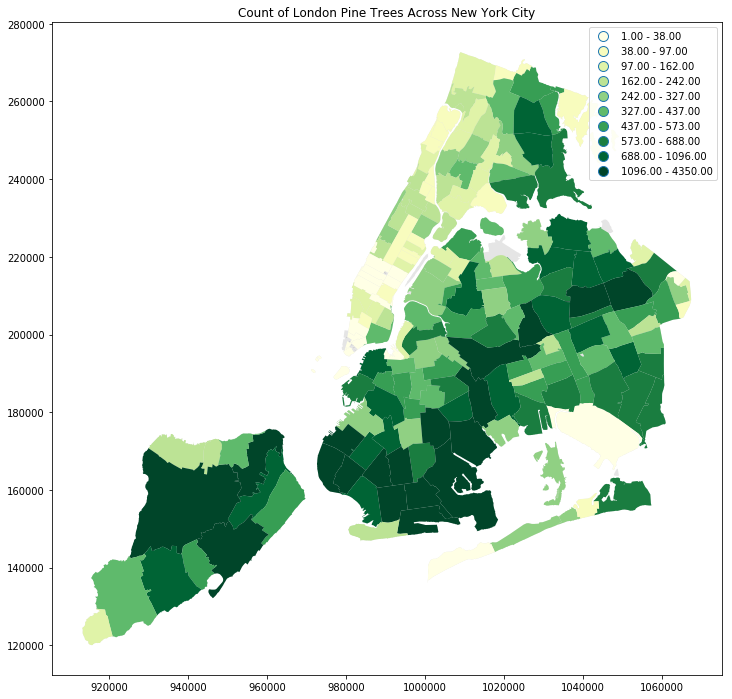

In [34]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
dfmap.plot(ax=ax, column='spc_common',cmap='YlGn',scheme='quantiles',k=10,legend=True);
plt.title('Count of London Pine Trees Across New York City', size=12)

In [40]:
dfmap.dtypes

ZIPCODE         int64
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
postcode        int64
spc_common      int64
dtype: object

In [41]:
dfmap['treepp'] = dfmap['spc_common']/dfmap['POPULATION']
dfmap.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,postcode,spc_common,treepp
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,452,0.024196
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,413,0.006616
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,1067,0.012723
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,442,0.007819
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,1016,0.014056


            Figure 1: Choropleth map of count of london pine trees in each zipcode

## Get zip code level asthma hospitalization rates

In [92]:
import pandas as pd
import numpy as np
import pylab as pl
from __future__ import print_function
import operator
import requests
from IPython.display import HTML
import warnings
import geopandas as gpd
from fiona.crs import from_epsg
import os
import json
import sys
import statsmodels.formula.api as smf
from scipy import stats as st
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dfas = pd.read_csv('data/asthma.csv')
dfas.head()

NameError: name 'pd' is not defined

In [119]:
df.columns

Index([u'tree_id', u'block_id', u'created_at', u'tree_dbh', u'stump_diam',
       u'curb_loc', u'status', u'health', u'spc_latin', u'spc_common',
       u'steward', u'guards', u'sidewalk', u'user_type', u'problems',
       u'root_stone', u'root_grate', u'root_other', u'trunk_wire',
       u'trnk_light', u'trnk_other', u'brch_light', u'brch_shoe',
       u'brch_other', u'address', u'postcode', u'zip_city', u'community board',
       u'borocode', u'borough', u'cncldist', u'st_assem', u'st_senate', u'nta',
       u'nta_name', u'boro_ct', u'state', u'latitude', u'longitude', u'x_sp',
       u'y_sp', u'council district', u'census tract', u'bin', u'bbl',
       u'Tree Type', u'ID', u'geometry'],
      dtype='object')

In [120]:
dfjoin = dfg.merge(dfas, left_on = 'postcode', right_on = 'ZipCode')
dfjoin.head()

,postcode,spc_common,Unnamed: 0,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,10001,21,0,10001.0,159.0,21.9
1,10002,388,1,10002.0,592.0,23.9
2,10003,133,2,10003.0,130.0,7.7
3,10007,5,6,10007.0,14.0,2.9
4,10009,165,7,10009.0,534.0,28.3


In [121]:
dfjoin = dfjoin[['postcode', 'spc_common','Discharges_2012-2014', 'Dicharge_Rate']]
dfjoin.head()

,postcode,spc_common,Discharges_2012-2014,Dicharge_Rate
0,10001,21,159.0,21.9
1,10002,388,592.0,23.9
2,10003,133,130.0,7.7
3,10007,5,14.0,2.9
4,10009,165,534.0,28.3


In [122]:
dfjoin.columns = ['postcode', 'pine_count', 'discharges_count', 'discharge_rate']
dfjoin.head()

,postcode,pine_count,discharges_count,discharge_rate
0,10001,21,159.0,21.9
1,10002,388,592.0,23.9
2,10003,133,130.0,7.7
3,10007,5,14.0,2.9
4,10009,165,534.0,28.3


In [123]:
dfjoin.sort_values('discharge_rate', ascending=False).head(10)

,postcode,pine_count,discharges_count,discharge_rate
52,10454,120,1075.0,94.8
53,10455,118,1052.0,84.5
49,10451,230,1125.0,77.1
55,10457,300,1644.0,75.8
54,10456,335,1999.0,74.3
57,10459,139,1041.0,69.4
23,10030,77,530.0,66.1
65,10467,337,1935.0,65.2
58,10460,147,1088.0,62.5
101,11221,523,1571.0,62.5


In [ ]:
dfjoin['discharges_rate'].plot.hist()

In [124]:
#merge both based on zipcode
dfmapas = pd.merge(zipsNYC, dfjoin, left_on='ZIPCODE', right_on='postcode')
dfmapas

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,postcode,pine_count,discharges_count,discharge_rate
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,452,153.0,27.5
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,413,852.0,43.7
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,1067,1567.0,59.5
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,442,548.0,30.7
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,1016,272.0,11.7
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",11226,327,1112.0,35.9
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",11219,890,195.0,6.9
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",11210,688,417.0,21.1
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",11230,1166,293.0,11.7
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,1365,177.0,7.2


Text(0.5,1,'Count of Asthma Discharges Across New York City')

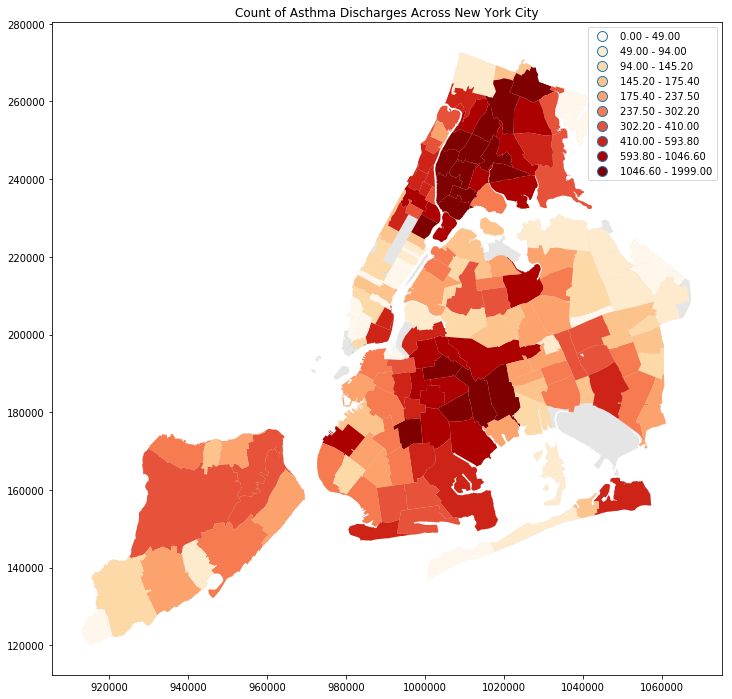

In [42]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
dfmapas.plot(ax=ax, column='discharges_count',cmap='OrRd',scheme='quantiles',k=10,legend=True);
plt.title('Count of Asthma Discharges Across New York City', size=12)

In [43]:
dfjoin.corr()

,postcode,pine_count,discharges_count,discharge_rate
postcode,1.000000,0.356393,-0.104755,-0.170517
pine_count,0.356393,1.000000,0.064361,-0.130950
discharges_count,-0.104755,0.064361,1.000000,0.828060
discharge_rate,-0.170517,-0.130950,0.828060,1.000000


In [44]:
#Statistical significance threshold throughout: $\alpha = 0.05$
alpha = 0.05

In [45]:
pearsons = scipy.stats.pearsonr(dfjoin.discharges_count, dfjoin.pine_count)
print ("Pearson's test result", pearsons)
if pearsons[1] >= alpha: 
    print (r"The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "is rejected (p = %.3f<0.05)"%pearsons[1])


Pearson's test result (0.064360817572163428, 0.40297411912601866)
The Null hypothesis that the count of pine trees are not related to asthma attacks cannot be rejected (p>=0.05)


In [46]:
pearsons_rate = scipy.stats.pearsonr(dfjoin.discharge_rate, dfjoin.pine_count)
print ("Pearson's test result", pearsons_rate)
if pearsons_rate[1] >= alpha: 
    print (r"The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "is rejected (p = %.3f<0.05)"%pearsons_rate[1])


Pearson's test result (-0.13095044624757229, 0.087785117449824923)
The Null hypothesis that the count of pine trees are not related to asthma attacks cannot be rejected (p>=0.05)


In [47]:
url = 'https://health.data.ny.gov/api/views/u4ud-w55t/rows.csv?accessType=DOWNLOAD'
filename = 'Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


Downloading...
File in place, proceed!


In [43]:
df_con = pd.read_csv('https://data.cityofnewyork.us/api/views/upjv-ar2g/rows.csv?accessType=DOWNLOAD')
df_con.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31,34,35,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,QUEENS,4311785,87-77,PARSONS BLVD.,440154440,1,A2,Y,9765,41,...,NY,11354,7.183539e+09,11/03/2017 12:00:00 AM,2745274,40.707312,-73.802539,24.0,44602.0,Jamaica
1,MANHATTAN,1089326,49,ANN STREET,120029511,1,A2,N,92,14,...,NY,10018,2.123343e+09,11/03/2017 12:00:00 AM,2833706,40.710306,-74.006828,1.0,1501.0,Battery Park City-Lower Manhattan
2,QUEENS,4200517,118-04,101 AVE,420829125,1,A2,N,9486,2,...,NY,11420,7.184407e+09,11/03/2017 12:00:00 AM,2573400,40.689746,-73.826697,28.0,106.0,South Ozone Park
3,MANHATTAN,1014236,282,7TH AVENUE,121895280,2,A2,Y,776,40,...,NY,10001,2.122178e+09,11/03/2017 12:00:00 AM,2696921,40.746147,-73.994168,3.0,95.0,Midtown-Midtown South
4,MANHATTAN,1087167,233,BROADWAY,121402981,1,A2,Y,123,7501,...,NY,10004,2.122333e+09,11/03/2017 12:00:00 AM,2453788,40.712265,-74.007892,1.0,21.0,SoHo-TriBeCa-Civic Center-Little Italy


In [44]:
df_con.columns

Index([u'BOROUGH', u'Bin #', u'House #', u'Street Name', u'Job #',
       u'Job doc. #', u'Job Type', u'Self_Cert', u'Block', u'Lot',
       u'Community Board', u'Zip Code', u'Bldg Type', u'Residential',
       u'Special District 1', u'Special District 2', u'Work Type',
       u'Permit Status', u'Filing Status', u'Permit Type',
       u'Permit Sequence #', u'Permit Subtype', u'Oil Gas', u'Site Fill',
       u'Filing Date', u'Issuance Date', u'Expiration Date', u'Job Start Date',
       u'Permittee's First Name', u'Permittee's Last Name',
       u'Permittee's Business Name', u'Permittee's Phone #',
       u'Permittee's License Type', u'Permittee's License #',
       u'Act as Superintendent', u'Permittee's Other Title', u'HIC License',
       u'Site Safety Mgr's First Name', u'Site Safety Mgr's Last Name',
       u'Site Safety Mgr Business Name', u'Superintendent First & Last Name',
       u'Superintendent Business Name', u'Owner's Business Type',
       u'Non-Profit', u'Owner's Business

In [46]:
df_con = df_con[['Expiration Date', 'Zip Code', 'Job Start Date', 'LATITUDE', 'LONGITUDE', 'PERMIT_SI_NO']]
df_con.head()

,Expiration Date,Zip Code,Job Start Date,LATITUDE,LONGITUDE,PERMIT_SI_NO
0,03/11/2015,11432.0,08/04/2014,40.707312,-73.802539,2745274
1,02/17/2016,10038.0,02/07/2012,40.710306,-74.006828,2833706
2,07/31/2014,11419.0,07/31/2013,40.689746,-73.826697,2573400
3,03/31/2015,10001.0,04/29/2014,40.746147,-73.994168,2696921
4,05/10/2013,10007.0,10/22/2012,40.712265,-74.007892,2453788


In [47]:
df_con.dtypes

Expiration Date     object
Zip Code           float64
Job Start Date      object
LATITUDE           float64
LONGITUDE          float64
PERMIT_SI_NO         int64
dtype: object

In [48]:
df_con = df_con.sort_values(by=['Job Start Date'], ascending=[True])
df_con.head()

,Expiration Date,Zip Code,Job Start Date,LATITUDE,LONGITUDE,PERMIT_SI_NO
252087,05/30/2013,10013.0,01/02/2013,40.724367,-74.010178,2479986
160351,01/02/2014,11233.0,01/02/2013,40.681094,-73.929889,2480300
340337,06/30/2013,10022.0,01/02/2013,40.760095,-73.961178,2480038
221188,02/25/2014,10024.0,01/02/2013,40.783635,-73.977980,2500660
474294,05/28/2016,10021.0,01/02/2013,40.773191,-73.964394,2886287


In [49]:
df_con.shape

(480127, 6)

In [50]:
df_con.dropna(inplace=True);

In [51]:
df_con['Job Start Date'] = pd.to_datetime(df_con['Job Start Date'])

In [52]:
df_con['Expiration Date'] = pd.to_datetime(df_con['Expiration Date'])

In [53]:
df_con['construction_days'] = df_con['Expiration Date'] - df_con['Job Start Date']
df_con.head()

,Expiration Date,Zip Code,Job Start Date,LATITUDE,LONGITUDE,PERMIT_SI_NO,construction_days
252087,2013-05-30,10013.0,2013-01-02,40.724367,-74.010178,2479986,148 days
160351,2014-01-02,11233.0,2013-01-02,40.681094,-73.929889,2480300,365 days
340337,2013-06-30,10022.0,2013-01-02,40.760095,-73.961178,2480038,179 days
221188,2014-02-25,10024.0,2013-01-02,40.783635,-73.977980,2500660,419 days
474294,2016-05-28,10021.0,2013-01-02,40.773191,-73.964394,2886287,1242 days


In [54]:
df_con['construction_days'] = df_con['construction_days'].dt.days

In [55]:
df_con.to_csv('construction_permits.csv')

In [56]:
df_con = pd.read_csv('construction_permits.csv')

In [57]:
df_con['Zip Code'] = df_con['Zip Code'].astype('int');

In [58]:
df_con["geometry"] = df_con.apply(lambda row: Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)
del(df_con["LATITUDE"], df_con["LONGITUDE"])
# Convert to a GeoDataFrame
df_con = gpd.GeoDataFrame(df_con, geometry="geometry")
df_con.crs = zipsNYC.crs

In [59]:
df_con.dtypes

Unnamed: 0            int64
Expiration Date      object
Zip Code              int64
Job Start Date       object
PERMIT_SI_NO          int64
construction_days     int64
geometry             object
dtype: object

In [60]:
df_con.head()

,Unnamed: 0,Expiration Date,Zip Code,Job Start Date,PERMIT_SI_NO,construction_days,geometry
0,252087,2013-05-30,10013,2013-01-02,2479986,148,POINT (-74.010178 40.724367)
1,160351,2014-01-02,11233,2013-01-02,2480300,365,POINT (-73.929889 40.681094)
2,340337,2013-06-30,10022,2013-01-02,2480038,179,POINT (-73.961178 40.760095)
3,221188,2014-02-25,10024,2013-01-02,2500660,419,POINT (-73.97798 40.783635)
4,474294,2016-05-28,10021,2013-01-02,2886287,1242,POINT (-73.964394 40.773191)


In [61]:
df_con = df_con[['PERMIT_SI_NO', 'construction_days', 'Zip Code', 'geometry']]

In [62]:
df_condays = df_con.groupby(['Zip Code'], as_index=False)['construction_days'].sum()

In [66]:
df_condays

,Zip Code,construction_days
0,10000,10143
1,10001,3900612
2,10002,2153108
3,10003,3924393
4,10004,1083970
5,10005,724152
6,10006,491884
7,10007,1153932
8,10009,1442085
9,10010,2242107


In [63]:
zipsNYC['ZIPCODE'] = zipsNYC['ZIPCODE'].astype(int)

In [64]:
df_conmap = df_condays.merge(zipsNYC, left_on='Zip Code', right_on='ZIPCODE')
df_conmap.head()

,Zip Code,construction_days,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,3900612,10001,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,2153108,10002,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003,3924393,10003,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004,1083970,10004,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10004,1083970,10004,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((972696.8446168154 193014.5477478057,..."


In [65]:
df_conmap['construction_days'] = df_conmap['construction_days'].astype(float)

In [88]:
df_conmap = gpd.GeoDataFrame(df_conmap)

Text(0.5,1,'Construction Days Across New York City')

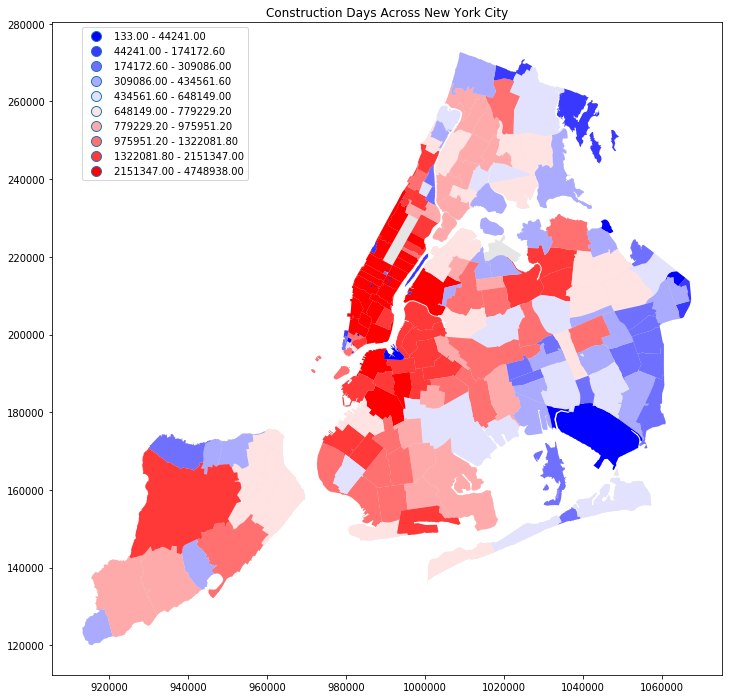

In [89]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
df_conmap.plot(ax=ax, column='construction_days',cmap='bwr',scheme='quantiles',k=10,legend=True)
ax.get_legend().set_bbox_to_anchor((0.3, 1));
plt.title('Construction Days Across New York City', size=12)

In [90]:
df_condays.head()

,Zip Code,construction_days
0,10000,10143
1,10001,3898874
2,10002,2153108
3,10003,3924393
4,10004,1083970


In [91]:
dfjoin_con = dfjoin.merge(df_condays, left_on='postcode', right_on='Zip Code')
dfjoin_con.head()

,postcode,pine_count,discharges_count,discharge_rate,Zip Code,construction_days
0,10001,21,159.0,21.9,10001,3898874
1,10002,388,592.0,23.9,10002,2153108
2,10003,133,130.0,7.7,10003,3924393
3,10007,5,14.0,2.9,10007,1153932
4,10009,165,534.0,28.3,10009,1442085


In [ ]:
B06011PR_001E

In [109]:
import readline
censusAPI = os.getenv('PUIDATA') + '/CensusAPI.txt'
f = open(os.getenv('PUIDATA') + '/CensusAPI.txt')
myAPI = f.readline()

In [110]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2014/acs5/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [111]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

In [116]:
#extracting variables of B07011_001E that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B07011") and 
 'Median income' in aff1y['variables'][k]['label']]

[('B07011_005M',
  'Margin of Error for!!Median income in the past 12 months --!! Moved from different state'),
 ('B07011PR_001M',
  'Margin of Error for!!Median income in the past 12 months --!!Total:'),
 ('B07011_004E',
  'Median income in the past 12 months --!! Moved from different county within same state'),
 ('B07011_002E',
  'Median income in the past 12 months --!! Same house 1 year ago'),
 ('B07011PR_005E',
  'Median income in the past 12 months --!! Moved from the United States'),
 ('B07011PR_001E', 'Median income in the past 12 months --!!Total:'),
 ('B07011PR_002E',
  'Median income in the past 12 months --!! Same house 1 year ago'),
 ('B07011PR_003M',
  'Margin of Error for!!Median income in the past 12 months --!! Moved within same municipio'),
 ('B07011PR_004M',
  'Margin of Error for!!Median income in the past 12 months --!! Moved from different municipio'),
 ('B07011PR_004E',
  'Median income in the past 12 months --!! Moved from different municipio'),
 ('B07011PR_002M

In [117]:
#keyword for the number of households
keyNhouseholds = 'B07011_001E'
aff1y['variables'][keyNhouseholds]

{'concept': 'B07011. Median Income in the Past 12 Months (in 2014 Inflation-Adjusted Dollars) by Geographical Mobility in the Past Year for Current Residence in the United States',
 'group': 'N/A',
 'label': 'Median income in the past 12 months --!!Total:',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

In [118]:
#keyword for the number of households with broarband access
keyNBB = 'B07011_001E'
aff1y['variables'][keyNBB]

{'concept': 'B07011. Median Income in the Past 12 Months (in 2014 Inflation-Adjusted Dollars) by Geographical Mobility in the Past Year for Current Residence in the United States',
 'group': 'N/A',
 'label': 'Median income in the past 12 months --!!Total:',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

In [22]:
df_acs = pd.read_csv('ACS_14_5YR_B19013_with_ann.csv')
df_acs.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Median household income in the past ...,Margin of Error; Median household income in th...
1,0100000US,NaN,United States,53482,95
2,1400000US36001000100,36001000100,"Census Tract 1, Albany County, New York",30750,14345
3,1400000US36001000200,36001000200,"Census Tract 2, Albany County, New York",21283,6579
4,1400000US36001000300,36001000300,"Census Tract 3, Albany County, New York",31591,13372


In [23]:
df_acs = df_acs.rename(columns=df_acs.iloc[0]).drop(df_acs.index[0])

In [24]:
df_acs.head()

,Id,Id2,Geography,Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),Margin of Error; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars)
1,0100000US,NaN,United States,53482,95
2,1400000US36001000100,36001000100,"Census Tract 1, Albany County, New York",30750,14345
3,1400000US36001000200,36001000200,"Census Tract 2, Albany County, New York",21283,6579
4,1400000US36001000300,36001000300,"Census Tract 3, Albany County, New York",31591,13372
5,1400000US36001000401,36001000401,"Census Tract 4.01, Albany County, New York",71343,4420


In [25]:
df_acs.dropna(inplace=True)

In [26]:
df_acs['Id2'] = df_acs['Id2'].astype(int)

In [27]:
zip_ct = pd.read_csv('ZIP_TRACT.csv')
zip_ct.head()

,﻿ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,0.000000,1.000000,0.000000,1.000000
1,601,72001956600,0.136735,0.358911,0.347222,0.154270
2,601,72001956700,0.859996,0.636139,0.652778,0.842387
3,601,72001956300,0.003269,0.004950,0.000000,0.003343
4,602,72003430300,0.037744,0.272500,0.315789,0.055036


In [28]:
acs_zip = df_acs.merge(zip_ct, left_on = 'Id2', right_on = 'TRACT', how='inner')
acs_zip.head()

,Id,Id2,Geography,Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),Margin of Error; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),﻿ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1400000US36001000100,36001000100,"Census Tract 1, Albany County, New York",30750,14345,12204,36001000100,0.239564,0.330490,0.036957,0.228785
1,1400000US36001000100,36001000100,"Census Tract 1, Albany County, New York",30750,14345,12207,36001000100,0.000000,0.011142,0.000000,0.004494
2,1400000US36001000200,36001000200,"Census Tract 2, Albany County, New York",21283,6579,12204,36001000200,0.026855,0.121535,0.054348,0.039019
3,1400000US36001000200,36001000200,"Census Tract 2, Albany County, New York",21283,6579,12207,36001000200,0.374366,0.057567,0.094340,0.224345
4,1400000US36001000200,36001000200,"Census Tract 2, Albany County, New York",21283,6579,12210,36001000200,0.370401,0.186765,0.215470,0.338299


In [29]:
acs_zip = acs_zip[acs_zip['Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars)'] != '-']

In [34]:
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [35]:
zipsNYC['ZIPCODE'] = zipsNYC['ZIPCODE'].astype(int)

In [36]:
#merge acs_zip with zipcode shapefile to return only median income for zips in NYC
medianY_zip = acs_zip.merge(zipsNYC, left_on = '﻿ZIP', right_on = 'ZIPCODE', how='inner')
medianY_zip.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


,Id,Id2,Geography,Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),Margin of Error; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),﻿ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,1400000US36005000200,36005000200,"Census Tract 2, Bronx County, New York",74837,18514,10473,36005000200,0.046887,0.047452,0.035849,...,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
1,1400000US36005000400,36005000400,"Census Tract 4, Bronx County, New York",77991,5195,10473,36005000400,0.071336,0.068541,0.058491,...,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
2,1400000US36005001600,36005001600,"Census Tract 16, Bronx County, New York",32354,4876,10473,36005001600,0.117284,0.188049,0.083019,...,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
3,1400000US36005002000,36005002000,"Census Tract 20, Bronx County, New York",23423,5396,10473,36005002000,0.145533,0.115993,0.243396,...,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
4,1400000US36005002800,36005002800,"Census Tract 28, Bronx County, New York",50388,8345,10473,36005002800,0.151209,0.124780,0.135849,...,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1026592.864449233 240976.7687522918,..."


In [37]:
medianY_zip = medianY_zip[['ZIPCODE', 'Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars)', 'POPULATION', 'geometry']]
medianY_zip.head()

,ZIPCODE,Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars),POPULATION,geometry
0,10473,74837,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
1,10473,77991,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
2,10473,32354,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
3,10473,23423,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
4,10473,50388,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."


In [38]:
medianY_zip.columns = ['ZIPCODE', 'Median Income', 'Population', 'geometry']
medianY_zip.dtypes

ZIPCODE            int64
Median Income     object
Population       float64
geometry          object
dtype: object

In [39]:
medianY_zip['Median Income'] = medianY_zip['Median Income'].astype(int)

In [40]:
medianYbyzip = medianY_zip.groupby('ZIPCODE', as_index=False)['Median Income'].sum()

In [41]:
medianYbyzip.head()

,ZIPCODE,Median Income
0,10001,1341828
1,10002,771627
2,10003,1420761
3,10004,2238020
4,10005,419409


In [6]:
df_311 = pd.read_csv('https://data.cityofnewyork.us/api/views/h7rh-mvxa/rows.csv?accessType=DOWNLOAD')
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,22959537,03/27/2012 09:35:00 AM,03/29/2012 12:00:00 PM,DSNY,BCC - Queens West,Dirty Conditions,E2 Receptacle Violation,Sidewalk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22961593,03/28/2012 05:16:00 PM,03/31/2012 12:00:00 PM,DSNY,A - Manhattan,Dirty Conditions,E1 Improper Disposal,Sidewalk,10025.0,241 WEST 97 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.795485,-73.971649,"(40.79548541404461, -73.97164874461878)"
2,22961595,03/28/2012 07:16:00 PM,03/30/2012 12:00:00 PM,DSNY,A - Manhattan,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,10128.0,323 EAST 90 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.780137,-73.949149,"(40.78013737314805, -73.94914920836769)"
3,22962373,03/28/2012 01:40:00 PM,04/03/2012 12:00:00 PM,DSNY,"A - Illegal Posting Staten Island, Queens and ...",Dirty Conditions,E15 Illegal Postering,Sidewalk,11413.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677415,-73.758788,"(40.677414816336075, -73.75878813259378)"
4,22962375,03/28/2012 01:40:00 PM,04/03/2012 12:00:00 PM,DSNY,"A - Illegal Posting Staten Island, Queens and ...",Dirty Conditions,E15 Illegal Postering,Sidewalk,11434.0,141-05 FARMERS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670697,-73.765009,"(40.67069747733496, -73.76500921627652)"


In [7]:
df_311.shape

(172478, 53)

In [8]:
df_311.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [9]:
df_311 = df_311[['Complaint Type','Incident Zip']]
df_311.head()

,Complaint Type,Incident Zip
0,Dirty Conditions,NaN
1,Dirty Conditions,10025.0
2,Dirty Conditions,10128.0
3,Dirty Conditions,11413.0
4,Dirty Conditions,11434.0


In [10]:
df_311.dropna(inplace=True)

In [12]:
df_311.head()

,Complaint Type,Incident Zip
1,Dirty Conditions,10025.0
2,Dirty Conditions,10128.0
3,Dirty Conditions,11413.0
4,Dirty Conditions,11434.0
5,Dirty Conditions,11385.0


In [16]:
df_311_count = df_311.groupby('Incident Zip', as_index=False).count()

In [74]:
df_311_count['Incident Zip'] = df_311_count['Incident Zip'].astype(int)

In [75]:
df_311_count.dtypes

Incident Zip      int64
Complaint Type    int64
dtype: object

In [79]:
medianY_zip.head()

,ZIPCODE,Median Income,Population,geometry
0,10473,74837,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
1,10473,77991,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
2,10473,32354,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
3,10473,23423,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."
4,10473,50388,58284.0,"POLYGON ((1026592.864449233 240976.7687522918,..."


In [80]:
#Finding median income by zipcode
medianYbyZIP = medianY_zip.groupby('ZIPCODE', as_index=False)['Median Income'].mean()
medianYbyZIP.head()

,ZIPCODE,Median Income
0,10001,111819.000000
1,10002,42868.166667
2,10003,109289.307692
3,10004,139876.250000
4,10005,139803.000000


In [81]:
income311zip = medianYbyZIP.merge(df_311_count, left_on='ZIPCODE', right_on='Incident Zip', how='inner')
income311zip.head()

,ZIPCODE,Median Income,Incident Zip,Complaint Type
0,10001,111819.000000,10001,549
1,10002,42868.166667,10002,1321
2,10003,109289.307692,10003,996
3,10004,139876.250000,10004,52
4,10005,139803.000000,10005,58


In [67]:
df_condays.head()

,Zip Code,construction_days
0,10000,10143
1,10001,3900612
2,10002,2153108
3,10003,3924393
4,10004,1083970


In [82]:
conY311 = df_condays.merge(income311zip, left_on='Zip Code', right_on='ZIPCODE', how = 'inner')
conY311.head()

,Zip Code,construction_days,ZIPCODE,Median Income,Incident Zip,Complaint Type
0,10001,3900612,10001,111819.000000,10001,549
1,10002,2153108,10002,42868.166667,10002,1321
2,10003,3924393,10003,109289.307692,10003,996
3,10004,1083970,10004,139876.250000,10004,52
4,10005,724152,10005,139803.000000,10005,58


In [84]:
conY311 = conY311[['Zip Code', 'construction_days', 'Median Income', 'Complaint Type']]
conY311.head()

,Zip Code,construction_days,Median Income,Complaint Type
0,10001,3900612,111819.000000,549
1,10002,2153108,42868.166667,1321
2,10003,3924393,109289.307692,996
3,10004,1083970,139876.250000,52
4,10005,724152,139803.000000,58


In [125]:
dfjoin.head()

,postcode,pine_count,discharges_count,discharge_rate
0,10001,21,159.0,21.9
1,10002,388,592.0,23.9
2,10003,133,130.0,7.7
3,10007,5,14.0,2.9
4,10009,165,534.0,28.3


In [127]:
dfall = dfjoin.merge(conY311, left_on='postcode', right_on='Zip Code', how='inner')
dfall.head()

,postcode,pine_count,discharges_count,discharge_rate,Zip Code,construction_days,Median Income,Complaint Type
0,10001,21,159.0,21.9,10001,3900612,111819.000000,549
1,10002,388,592.0,23.9,10002,2153108,42868.166667,1321
2,10003,133,130.0,7.7,10003,3924393,109289.307692,996
3,10007,5,14.0,2.9,10007,1153932,161590.666667,221
4,10009,165,534.0,28.3,10009,1442085,58229.461538,1202


In [130]:
dfall.drop('Zip Code', axis = 1, inplace=True)
dfall.head()

,postcode,pine_count,discharges_count,discharge_rate,construction_days,Median Income,Complaint Type
0,10001,21,159.0,21.9,3900612,111819.000000,549
1,10002,388,592.0,23.9,2153108,42868.166667,1321
2,10003,133,130.0,7.7,3924393,109289.307692,996
3,10007,5,14.0,2.9,1153932,161590.666667,221
4,10009,165,534.0,28.3,1442085,58229.461538,1202


In [132]:
dfall.columns = ['Zip Code', 'Pine Count', 'Discharges Count', 'Discharge Rate', 'Construction Days', 'Median Income', 'Cleanliness Complaints']
dfall.head()

,Zip Code,Pine Count,Discharges Count,Discharge Rate,Construction Days,Median Income,Cleanliness Complaints
0,10001,21,159.0,21.9,3900612,111819.000000,549
1,10002,388,592.0,23.9,2153108,42868.166667,1321
2,10003,133,130.0,7.7,3924393,109289.307692,996
3,10007,5,14.0,2.9,1153932,161590.666667,221
4,10009,165,534.0,28.3,1442085,58229.461538,1202


In [133]:
dfall.corr()

,Zip Code,Pine Count,Discharges Count,Discharge Rate,Construction Days,Median Income,Cleanliness Complaints
Zip Code,1.000000,0.361666,-0.101087,-0.165993,-0.440752,-0.265074,0.074079
Pine Count,0.361666,1.000000,0.059511,-0.139110,-0.152696,-0.081543,0.344573
Discharges Count,-0.101087,0.059511,1.000000,0.827076,-0.108186,-0.616725,0.646210
Discharge Rate,-0.165993,-0.139110,0.827076,1.000000,-0.274399,-0.679383,0.344299
Construction Days,-0.440752,-0.152696,-0.108186,-0.274399,1.000000,0.545964,0.102906
Median Income,-0.265074,-0.081543,-0.616725,-0.679383,0.545964,1.000000,-0.373902
Cleanliness Complaints,0.074079,0.344573,0.646210,0.344299,0.102906,-0.373902,1.000000


In [140]:
alpha = 0.05
for col in dfall.columns: 
    pearsons = scipy.stats.pearsonr(dfall['Discharges Count'], dfall[col])
    print ("Pearson's test result", pearsons)
    if pearsons[1] >= alpha: 
        print (r"The Null hypothesis that " + col + " are not related to asthma attacks " + 
           "cannot be rejected (p>=0.05)")
    else: 
        print ("The Null hypothesis that " + col + " are not related to asthma attacks " + 
           "is rejected (p = %.3f<0.05)"%pearsons[1])


Pearson's test result (-0.1010872470468774, 0.18963666333676701)
The Null hypothesis that Zip Code are not related to asthma attacks cannot be rejected (p>=0.05)
Pearson's test result (0.05951076524081899, 0.44077553038499173)
The Null hypothesis that Pine Count are not related to asthma attacks cannot be rejected (p>=0.05)
Pearson's test result (1.0, 0.0)
The Null hypothesis that Discharges Count are not related to asthma attacks is rejected (p = 0.000<0.05)
Pearson's test result (0.82707587896175716, 6.8761158976730625e-44)
The Null hypothesis that Discharge Rate are not related to asthma attacks is rejected (p = 0.000<0.05)
Pearson's test result (-0.10818636212318029, 0.16023083471175378)
The Null hypothesis that Construction Days are not related to asthma attacks cannot be rejected (p>=0.05)
Pearson's test result (-0.61672476814790234, 3.4262179358772068e-19)
The Null hypothesis that Median Income are not related to asthma attacks is rejected (p = 0.000<0.05)
Pearson's test result 